In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/2023_nba_player_stats.csv')

In [24]:
df.shape

(539, 30)

Limipiamos los valores NaN

In [29]:
df['POS'] = df['POS'].fillna('PF')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     539 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

<Axes: >

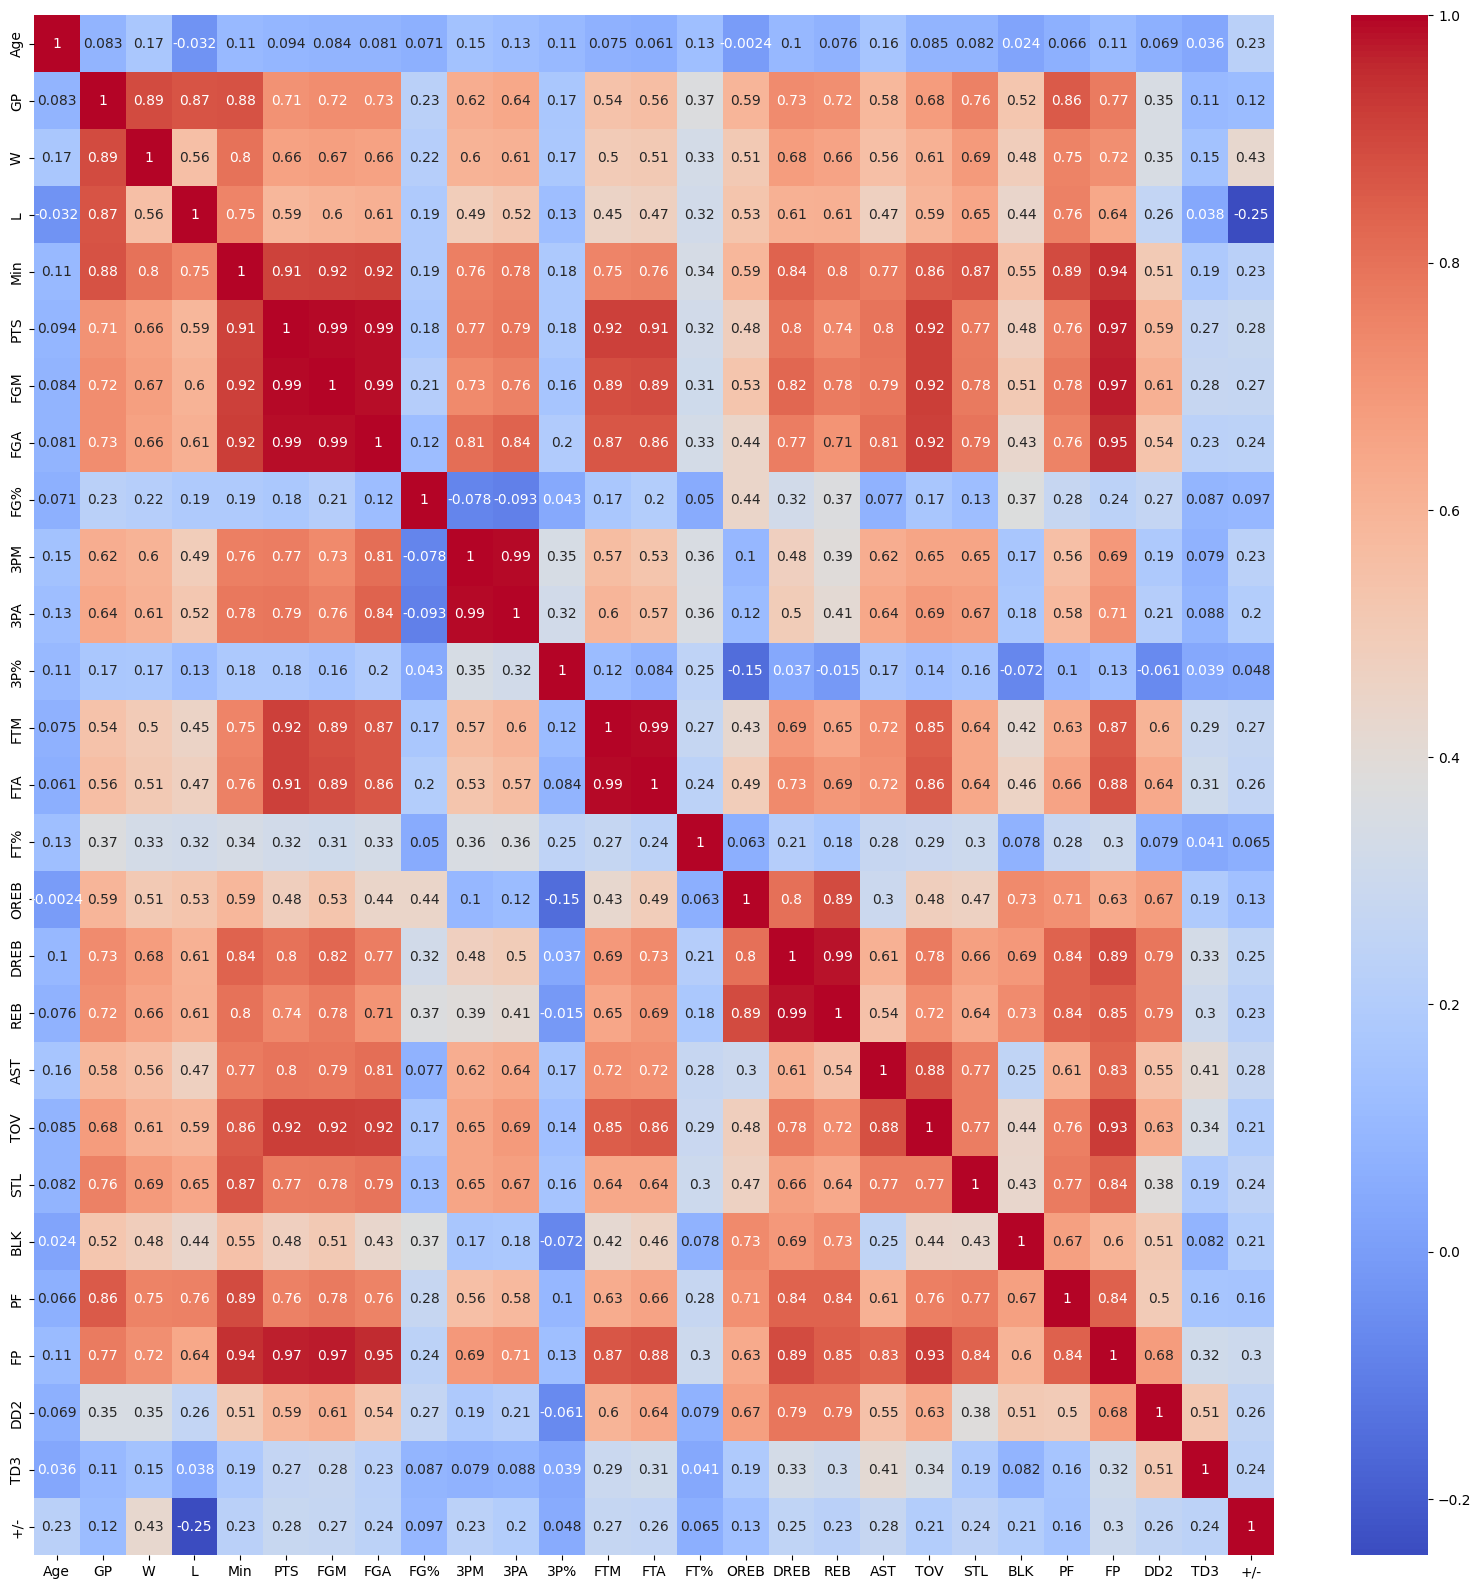

In [13]:
corr_mat = df.iloc[:,3:].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

## Regresión lineal simple

 $$y = \beta_0 + \beta_1x + \epsilon$$


**Método de mínimos cuadrados**.

Las estimaciones de mínimos cuadrados de la pendiente y el punto de corte con el eje y del modelo de regresión lineal simple son

$$\hat{\beta_0}= \bar{y} - \hat{\beta_1} \bar{x}$$

$$\hat{\beta_1}= \dfrac{\sum_1^n y_i x_i-\dfrac{(\sum_1^n y_i)(\sum_1^n x_i)}{n}}{\sum_1^n x_i^2-\dfrac{(\sum_1^n x_i)^2}{n}}$$

donde $\bar{y}= (1/n)\sum_1^n y_i$ y $\bar{x}= (1/n)\sum_1^n x_i$.

Las fórmulas de cálculo para el numerador y denominador de la expresión anterior podemos expresarlas de la siguiente manera:

$$\beta_1 = \dfrac{S_{XY}}{S_{XX}}$$

$$ S_{XY}= \sum_1^n y_i (x_i - \bar{x}) = \sum_1^n x_i y_i - \dfrac{(\sum_1^n y_i)(\sum_1^n x_i)}{n} $$ y $$S_{XX} = \sum_1^n (x_i - \bar{x})^2 = \sum_1^n x_i^2 - \dfrac{(\sum_1^n x_i)^2}{n} $$

In [ ]:
# import pandas as pd
# import requests

# url = "https://www.datos.gov.co/resource/fc78-ab9i.json"

# try:
#   response = requests.get(url)
#   response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

#   data = response.json()
#   df = pd.DataFrame(data)
#   print(df.head())  # Print the first few rows of the DataFrame

# except requests.exceptions.RequestException as e:
#   print(f"Error connecting to API: {e}")
# except Exception as e:
#   print(f"Error processing data: {e}")


      cod     deptos cod_mun    municipio   a_o tasa_natalidad nacimientos  \
0  68.001  SANTANDER  68.001  Bucaramanga  2008          18.14       9.457   
1  68.001  SANTANDER  68.001  Bucaramanga  2009          16.85       8.807   
2  68.001  SANTANDER  68.001  Bucaramanga  2010          16.03       8.402   
3  68.001  SANTANDER  68.001  Bucaramanga  2011          16.88       8.866   
4  68.001  SANTANDER  68.001  Bucaramanga  2012          17.38       9.142   

  tasa_fecundidad_gral mujer_15_a_49_a_os mujer_10_a_49_a_os  ...  \
0                63.14            149.769            172.174  ...   
1                   59            149.264            171.436  ...   
2                56.55            148.569            170.459  ...   
3                60.02            147.724            169.288  ...   
4                62.31            146.727            167.894  ...   

  tasa_incidencia_violencia_1 casos_violencia_60_a_os  \
0                           0                       0   
1 

In [ ]:
# try:
#   df.to_csv('data.csv', index=False)  # Save to a CSV file named 'data.csv' in the current directory (Archivos), no en drive
#   print("DataFrame saved as data.csv")
# except Exception as e:
#   print(f"Error saving DataFrame as CSV: {e}")


DataFrame saved as data.csv


In [34]:
def regresion(x, y):
  #algunos valores
  n = np.size(x)
  sum_xy = np.sum(x*y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x**2)
  x_barra = np.sum(x)/n
  y_barra = np.sum(y)/n
  SXY = sum_xy - (sum_y*sum(x))/(n)
  SXX = sum_x2- (sum_x**2)/(n)

  #coeficientes y recta
  B1 = SXY/SXX
  B0 = y_barra - B1*x_barra
  y_estimados = B0 + B1*x #grafica

  print('Mi recta de regresión es', B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)
  return B0, B1, y_estimados

In [44]:
# Select 'x' and 'y' variables
x_column = 'Min'
y_column = 'PTS'


Mi recta de regresión es -79.59917761313636 + 0.5464083573578485 x
B0 es -79.59917761313636 y B1 es 0.5464083573578485


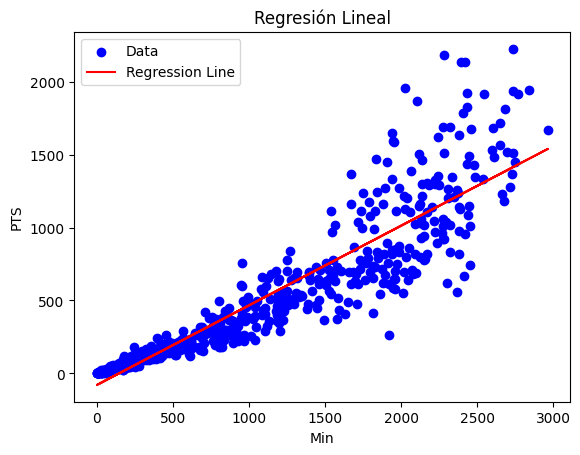

In [45]:
# x Tasa fecundidad gral
# y =Tasa Natalidad

try:
  x = df[x_column].astype(float)
  y = df[y_column].astype(float)

  # Call the regression function with your x and y data
  B0, B1, y_estimados = regresion(x, y)

  # Plot the data and the regression line (optional)
  plt.scatter(x, y, color='blue', label='Data')
  plt.plot(x, y_estimados, color='red', label='Regression Line')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Regresión Lineal')
  plt.legend()
  plt.show()

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")



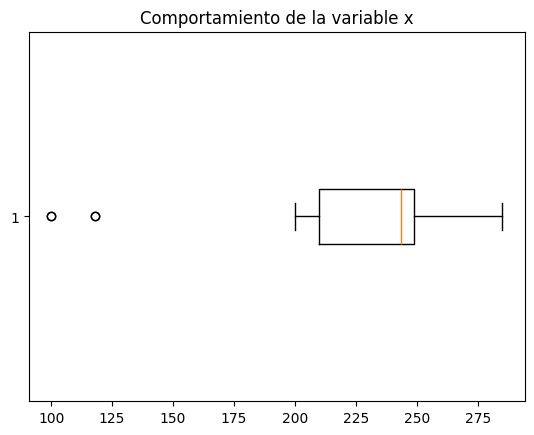

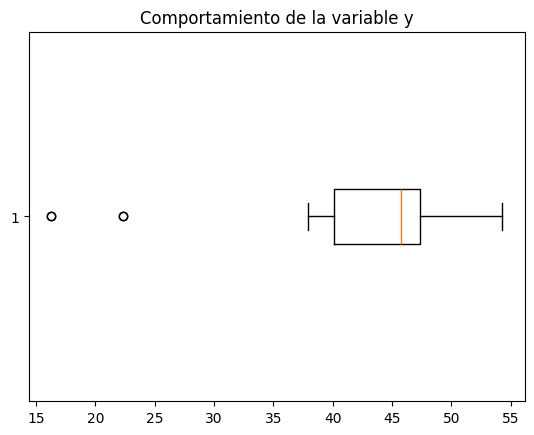

In [ ]:
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.show()

plt.boxplot(y, vert=False) #important
plt.title('Comportamiento de la variable y')
plt.show()

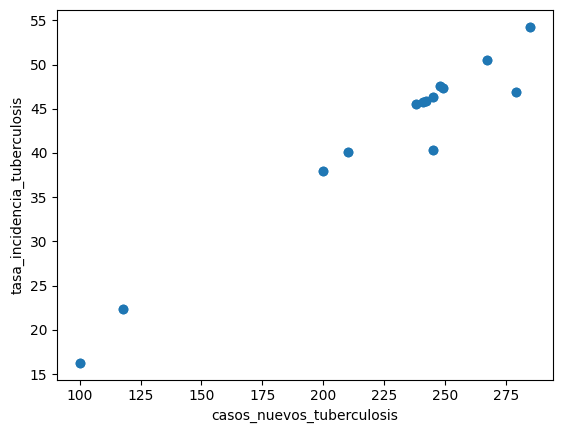

In [ ]:
plt.plot(x, y, 'o') #gráfica con las variables x y y.
plt.title('')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [ ]:
y

,tasa_incidencia_tuberculosis
0,47.56
1,45.52
2,40.07
3,54.27
4,47.33
5,45.75
6,37.92
7,45.84
8,22.34
9,50.52


In [ ]:
x

,casos_nuevos_tuberculosis
0,248.0
1,238.0
2,210.0
3,285.0
4,249.0
5,241.0
6,200.0
7,242.0
8,118.0
9,267.0


In [ ]:
def y_estimado(B0, B1, z):
  y_estimado = B0 + B1*z
  print('el valor estimado de y para',  z, 'es', y_estimado)
  return y_estimado

y_150 = y_estimado(B0, B1, 150)

el valor estimado de y para 150 es 27.6056039673584


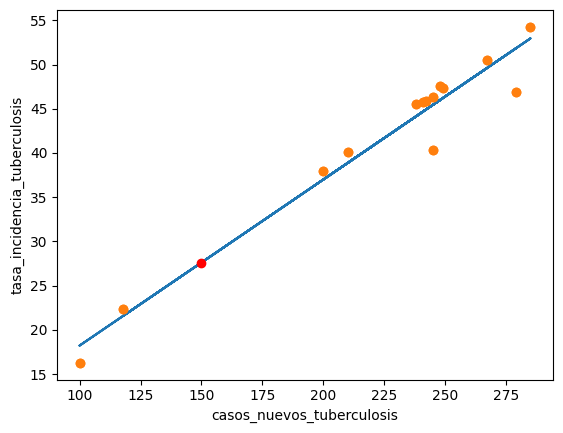

In [ ]:
plt.plot(x, y_estimados) #recta
plt.plot(x, y, 'o')
plt.plot(150, y_150, 'ro') #x=50
plt.title('')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

# Estimación de $\sigma^2$

$\sigma^2$ determina la cantidad de variabilidad, es decir, la variación aleatoria alrededor de la verdadera recta de regresión. Para valores grandes de $\sigma^2$ los puntos observados están bastante dispersos en torno a la línea de regresión verdadera, mientras que para valores pequeños de $\sigma^2$ los puntos observados tenderán a quedar cerca de la línea verdadera.

Usaremos los **residuales** para calcular la estimación de $\sigma^2$, estos son las desviaciones verticales con respecto a la línea estimada, es decir, la diferencia entre la $y_i$ observada y la $\hat{y_i }$ estimada: $e_i= y_i - \hat{y_i }$ con $i= 1, 2, ..., n$.

**La suma de los cuadrados de los residuales** es

$$ SS_E = SC_E = \sum_1^n e_i^2 = \sum (y_i - \hat{y_i })^2 $$

El cálculo de SSE con la fórmula definitoria implica mucha aritmética porque primero se deben calcular los valores pronosticados y residuos. Una forma más conveniente para calcular *SSE* sería:

$$ SS_E = \sum[y_i- (\hat{\beta_0} + \hat{\beta_1}x_1)]^2 = \sum y_i^2 - \hat{\beta_0 }\sum y_i - \hat{\beta_1 }\sum x_iy_i $$


y **la estimación de $\hat{\sigma}^2$** es

$$ \hat{\sigma}^2 = s^2 = \dfrac{SS_E}{n-2}. $$

In [46]:
def reg2(x, y):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  x_barra = np.sum(x) / n
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica

  # Calcular SSE
  SSE = np.sum((y - y_estimados) ** 2)

  # Calcular R^2
  SST = np.sum((y - y_barra) ** 2)
  R2 = 1 - (SSE / SST)

  # Calcular G
  G = np.sqrt(SSE / (n - 2))

  print('Mi recta de regresión es', B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)
  print('SSE es', SSE)
  print('R^2 es', R2)
  print('G es', G)

  return B0, B1, y_estimados, SSE, R2, G

Mi recta de regresión es -79.59917761313636 + 0.5464083573578485 x
B0 es -79.59917761313636 y B1 es 0.5464083573578485
SSE es 23410936.02083876
R^2 es 0.8245995541948371
G es 208.79603450235425


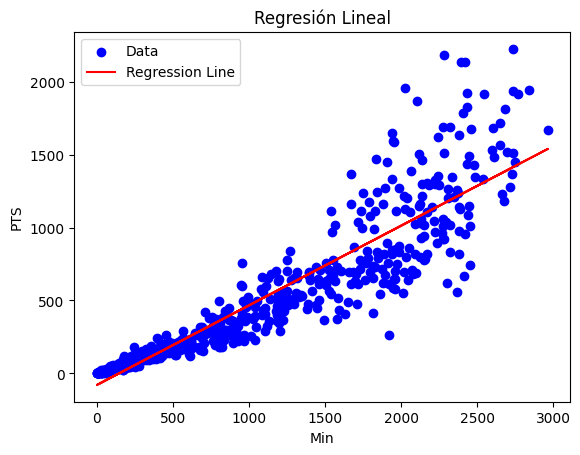

In [47]:
try:
  x = df[x_column].astype(float)
  y = df[y_column].astype(float)

  B0, B1, y_estimados, SSE, R2, G = reg2(x, y)

  plt.scatter(x, y, color='blue', label='Data')
  plt.plot(x, y_estimados, color='red', label='Regression Line')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Regresión Lineal')
  plt.legend()
  plt.show()

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")


In [48]:
def reg3(x, y):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  x_barra = np.sum(x) / n
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica

  # Calcular SSE
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)

  # Sigma 2
  sigma2 = SSE/(n-2)
  sigma = np.sqrt(sigma2)

  # Calcular G
  G = np.sqrt(SSE / (n - 2))

  print('Mi recta de regresión es', B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)
  print('SSE es', SSE)
  print('sigma2 es', sigma2)
  print('sigma es', sigma)

  return B0, B1, y_estimados, SSE, sigma2, sigma

Mi recta de regresión es -79.59917761313636 + 0.5464083573578485 x
B0 es -79.59917761313636 y B1 es 0.5464083573578485
SSE es 23410936.020838737
sigma2 es 43595.784023908265
sigma es 208.79603450235416


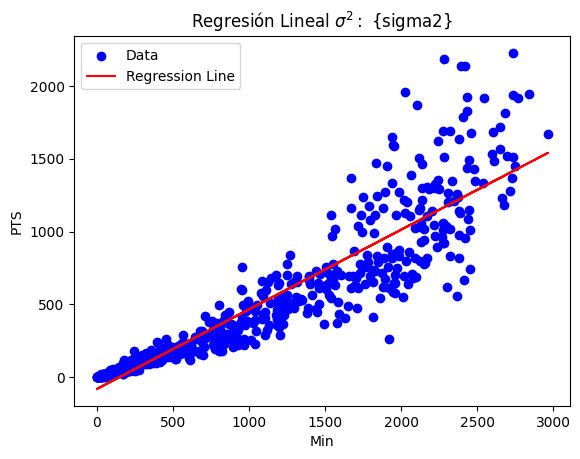

In [55]:
try:
  x = df[x_column].astype(float)
  y = df[y_column].astype(float)

  B0, B1, y_estimados, SSE, sigma2, sigma = reg3(x, y)

  plt.scatter(x, y, color='blue', label='Data')
  plt.plot(x, y_estimados, color='red', label='Regression Line')
  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title('Regresión Lineal $\sigma^2:$ {sigma2}')
  plt.legend()
  plt.show()

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")